# Day 4 question

Download the data set about Value of Energy Cost Saving Program for businesses in New York City (under the "Export" option, there is a way to retrieve a CSV file). Answer the following questions.

    How many different companies are represented in the data set?
    What is the total number of jobs created for businesses in Queens?
    How many different unique email domains names are there in the data set?
    Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?
    Save your result for the previous question as a CSV file.


In [1]:
import numpy as np
import pandas as pd

In [2]:
#Read in csv file
df = pd.read_csv('./Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv')
df.keys()

Index(['Company Name', 'company contact', 'company email', 'company phone',
       'Address', 'City', 'State', 'Postcode', 'Industry', 'Industry descr',
       'Company Type', 'Current fulltime', 'Job created', 'Job retain',
       'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA'],
      dtype='object')

In [3]:
#Find num unique company names
print('1. There are', df['Company Name'].nunique(), 'unique companies.')

1. There are 439 unique companies.


In [4]:
#Group by boroughs.  Find total jobs created in Queens.
borough_groups = df.groupby('Borough')
queens_new_jobs = borough_groups.get_group('Queens')['Job created'].sum()
print('2. Jobs created in Queens:', queens_new_jobs)

2. Jobs created in Queens: 102.0


In [5]:
#Obtain unique email domain names.
emails = df['company email'].dropna()

domains = [ee.split('@')[-1] for ee in emails]

unique_domains = set(domains)
print('3. Emails: ', len(emails))
print('   Unique domain names: ', len(unique_domains))

3. Emails:  433
   Unique domain names:  361


In [6]:
nta_groups = df.groupby('NTA')

In [7]:
nta_groups.count()['Company Name']>=5

NTA
Astoria                              False
Baisley Park                         False
Battery Park City-Lower Manhattan     True
Bedford                              False
Bensonhurst West                     False
                                     ...  
Whitestone                           False
Williamsburg                         False
Windsor Terrace                      False
Woodside                             False
park-cemetery-etc-Brooklyn            True
Name: Company Name, Length: 79, dtype: bool

In [8]:
nta_groups['Job created'].sum()

NTA
Astoria                               0.0
Baisley Park                          0.0
Battery Park City-Lower Manhattan     0.0
Bedford                               0.0
Bensonhurst West                      0.0
                                     ... 
Whitestone                           10.0
Williamsburg                          0.0
Windsor Terrace                       0.0
Woodside                              0.0
park-cemetery-etc-Brooklyn            0.0
Name: Job created, Length: 79, dtype: float64

In [9]:
index = nta_groups.count()['Company Name']>=5
mean_total_savings = nta_groups['Total Savings'].mean()[index]
total_jobs_created = nta_groups['Job created'].sum()[index]

mean_total_savings.name = 'Mean total savings'
total_jobs_created.name = 'Total jobs created'
q5 = pd.merge(mean_total_savings, total_jobs_created,right_index = True,left_index = True)
q5.to_csv('./day4.csv')

# Day 5 questions 


Day 5: Plotting

Matplotlib is Python's most popular plotting package. It provides an object-oriented programming API and a procedural API similar to that of MATLAB. While much can be done with Matplotlib, for both nicer looking and statistically focused visualization, consider using Seaborn, which extends and builds on Matplotlib.

With these plotting libraries, don't focus on trying to memorize the entire API. A good starting point is to visit the examples page and look for similar visualizations of what you are trying to build. Altair and Bokeh are two Python packages for creating interactive visualizations. In the Fellowship program, we'll focus on using Altair.

Milestone Action Items

    Go through the Introductory Tutorials on Matplotlib.
    Using the same data set and results that you were working with in the pandas action items section (Day 4), create a
        scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.
        histogram of the log of the average total savings.
        line plot of the total jobs created for each month.
    If you have time, take a look at this short tutorial on Altair.



In [10]:
import matplotlib.pyplot as plt

In [11]:
q5.keys()

Index(['Mean total savings', 'Total jobs created'], dtype='object')

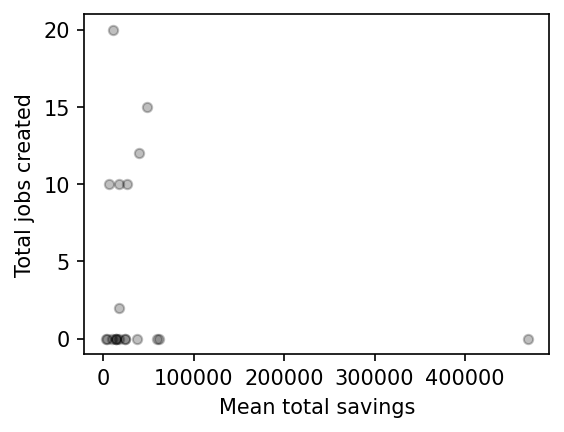

In [12]:
xn = q5.keys()[0]
yn = q5.keys()[1]
x = q5[xn]
y = q5[yn]
plt.figure(dpi=150, figsize=(4,3))
plt.scatter(x,y, marker ='o', s = 20, c = 'k', alpha = 0.25)
plt.xlabel(xn)
plt.ylabel(yn)
plt.show()

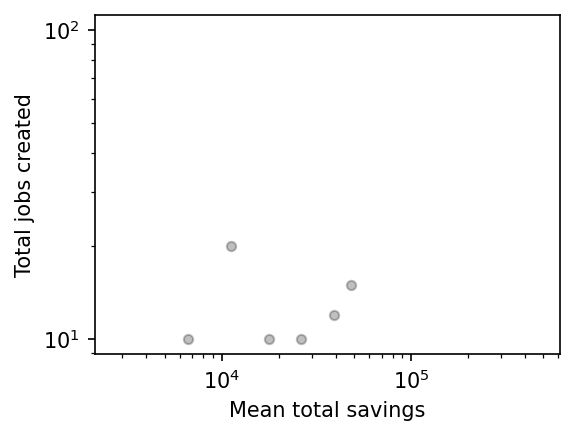

In [13]:
plt.figure(dpi=150, figsize=(4,3))
plt.scatter(x,y, marker ='o', s = 20, c = 'k', alpha = 0.25)
plt.xlabel(xn)
plt.ylabel(yn)
plt.xscale('log')
plt.yscale('log')
plt.show()

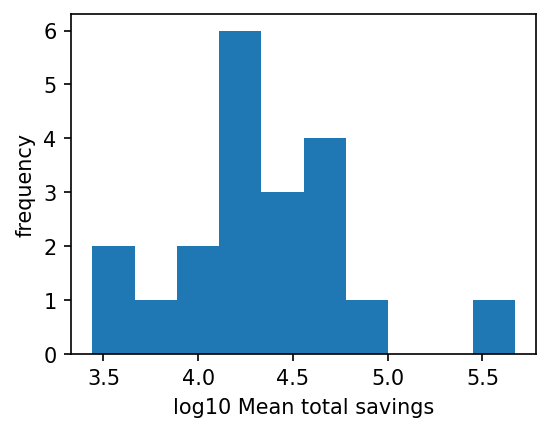

In [14]:
import numpy as np
plt.figure(dpi=150, figsize=(4,3))
plt.hist(np.log10(x))
plt.xlabel('log10 ' + xn)
plt.ylabel('frequency')
#plt.xscale('log')
plt.show()

In [15]:
df_jobs = df.dropna(subset=['Job created'])
df_jobs = df_jobs[['Job created', 'Effective Date']].sort_values(by='Effective Date')
df_jobs['Effective Date'] = pd.to_datetime(df_jobs['Effective Date'])

Text(0, 0.5, 'Job created')

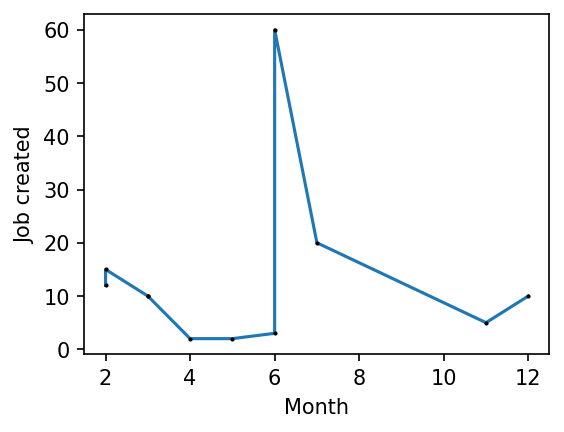

In [16]:
x = df_jobs['Effective Date'].dt.month
y = df_jobs['Job created']
plt.figure(dpi = 150, figsize=(4,3))
plt.plot(x,y, zorder = 1)
plt.scatter(x,y, s = 1, c = 'k', zorder = 2)
plt.xlabel('Month')
plt.ylabel(y.name)